# Team 4: Convolutional layers: number, kernel size, stride


*   Jordi Solé
*   Denys Ovsiyenko
*   Bengisu Kuru
*   Arnau Tamborero


In this notebook, we evaluate diferent configurations of convolutional networks for a multiclass classification over the MNIST dataset.
 
The MNIST dataset consists in 28x28 pixel pictures of handwritten digits from 0 to 9.


 ![MNIST Dataset (Img Credit: Web)](https://miro.medium.com/max/1212/1*FL6DWzN-awxCaG8bS1ZD_Q.png)


The diferent testing configurations are obtained by changing some parameters, such as, the number of convolutional layers, the kernel size and the stride. For each case, we assess the time needed to perform the training and the accuracy obtained. Once computed, we implement a kind of benchmark test to obtain the best training regarding time and accuracy.

1. Install the needed packages

In [0]:
!pip install pillow==5.4.1
!pip install matplotlib
!pip install scikit-learn
!pip install torch
!pip install torchvision

2. Import all the libraries: matplotlib, numpy, torch, and the built-in python libraries random and time.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import time

3. Init some parameters for random numbers and CUDA

In [0]:
seed = 20
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)

4. Create a class to define each net. In each class we do have to calculate the resulting shape of each operation in order to feed it to the next one.

**Number of convolutional layers:** 2

**Kernel size:** 5


**Stride:** 1


In [0]:
class Net_c2_k5_s1(nn.Module):
    def __init__(self):
        super(Net_c2_k5_s1, self).__init__()

        #We use only one input channel because we only have grayscay images
        #if we had a colour image, the input channels would be 3
        #input channels, output channels, kernel size, stride
        self.conv1 = nn.Conv2d(1, 20, 5, 1) 
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500) 
        self.fc2 = nn.Linear(500, 10) 

    def forward(self, x):
        # [width,depth,channels,n]
        x = F.relu(self.conv1(x)) # 24x24x20
        x = F.max_pool2d(x, 2, 2) # 12x12x20
        x = F.relu(self.conv2(x)) # 8x8x50
        x = F.max_pool2d(x, 2, 2) # 4x4x50
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #Multiclassification needs softmax as output function
        #Exponentiate the number and normalize
        #We use here a logarithmic version of softmax so we can use NLLLoss
        #(Negative Log-Likelihood Loss)
        return F.log_softmax(x, dim=1) 

**Number of convolutional layers:** 2

**Kernel size:** 5


**Stride:** 2

In [0]:
class Net_c2_k5_s2(nn.Module):
    def __init__(self):
        super(Net_c2_k5_s2, self).__init__()

        #We use only one input channel because we only have grayscay images
        #if we had a colour image, the input channels would be 3
        self.conv1 = nn.Conv2d(1, 20, 5, 2) #input channels, output channels, kernel size, stride
        self.conv2 = nn.Conv2d(20, 50, 5, 2)
        self.fc1 = nn.Linear(1*1*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        # [width,depth,channels,n]
        x = F.relu(self.conv1(x)) # 12x12x20
        x = F.max_pool2d(x, 2, 2) # 6x6x20
        x = F.relu(self.conv2(x)) # 1x1x50
        x = F.max_pool2d(x, 1, 1) # 1x1x50
        x = x.view(-1, 1*1*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return F.log_softmax(x, dim=1) 

**Number of convolutional layers:** 2

**Kernel size:** 3


**Stride:** 1


In [0]:
class Net_c2_k3_s1(nn.Module):
    def __init__(self):
        super(Net_c2_k3_s1, self).__init__()

        #We use only one input channel because we only have grayscay images
        #if we had a colour image, the input channels would be 3
        self.conv1 = nn.Conv2d(1, 20, 3, 1) #input channels, output channels, kernel size, stride
        self.conv2 = nn.Conv2d(20, 50, 3, 1)
        self.fc1 = nn.Linear(5*5*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        # [width,depth,channels,n]
        x = F.relu(self.conv1(x)) # 26x26x20
        x = F.max_pool2d(x, 2, 2) # 13x13x20
        x = F.relu(self.conv2(x)) # 11x11x50
        x = F.max_pool2d(x, 2, 2) # 5x5x50
        x = x.view(-1, 5*5*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return F.log_softmax(x, dim=1) 

**Number of convolutional layers:** 2

**Kernel size:** 2


**Stride:** 1

In [0]:
class Net_c2_k2_s1(nn.Module):
    def __init__(self):
        super(Net_c2_k2_s1, self).__init__()

        #We use only one input channel because we only have grayscay images
        #if we had a colour image, the input channels would be 3
        self.conv1 = nn.Conv2d(1, 20, 2, 1) #input channels, output channels, kernel size, stride
        self.conv2 = nn.Conv2d(20, 50, 2, 1)
        self.fc1 = nn.Linear(6*6*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        # [width,depth,channels,n]
        x = F.relu(self.conv1(x)) # 27x27x20 
        x = F.max_pool2d(x, 2, 2) # 13x13x20
        x = F.relu(self.conv2(x)) # 12x12x50 
        x = F.max_pool2d(x, 2, 2) # 6x6x50 
        x = x.view(-1, 6*6*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return F.log_softmax(x, dim=1) 

**Number of convolutional layers:** 2

**Kernel size:** 2


**Stride:** 2

In [0]:
class Net_c2_k2_s2(nn.Module):
    def __init__(self):
        super(Net_c2_k2_s2, self).__init__()

        #We use only one input channel because we only have grayscay images
        #if we had a colour image, the input channels would be 3
        self.conv1 = nn.Conv2d(1, 20, 2, 2) #input channels, output channels, kernel size, stride
        self.conv2 = nn.Conv2d(20, 50, 2, 2)
        self.fc1 = nn.Linear(1*1*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        # [width,depth,channels,n]
        x = F.relu(self.conv1(x)) # 14x14x20
        x = F.max_pool2d(x, 2, 2) # 7x7x20
        x = F.relu(self.conv2(x)) # 3x3x50
        x = F.max_pool2d(x, 3, 3) # 1x1x50
        x = x.view(-1, 1*1*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return F.log_softmax(x, dim=1) 

**Number of convolutional layers:** 3

**Kernel size:** 2


**Stride:** 1

In [0]:
class Net_c3_k2_s1(nn.Module):
    def __init__(self):
        super(Net_c3_k2_s1, self).__init__()

        #We use only one input channel because we only have grayscay images
        #if we had a colour image, the input channels would be 3
        self.conv1 = nn.Conv2d(1, 20, 2, 1) #input channels, output channels, kernel size, stride
        self.conv2 = nn.Conv2d(20, 50, 2, 1)
        self.conv3 = nn.Conv2d(50,100,2,1)
        self.fc1 = nn.Linear(2*2*100, 250)
        self.fc2 = nn.Linear(250, 10)

    def forward(self, x):
        # [width,depth,channels,n]
        x = F.relu(self.conv1(x)) # 27x27x20
        x = F.max_pool2d(x, 2, 2) # 13x13x20
        x = F.relu(self.conv2(x)) # 12x12x50
        x = F.max_pool2d(x, 2, 2) # 6x6x50
        x = F.relu(self.conv3(x)) # 5x5x100
        x = F.max_pool2d(x, 2, 2) # 2x2x100
        x = x.view(-1, 2*2*100)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return F.log_softmax(x, dim=1) 

5. Create the training function

In [0]:
def train(log_interval, model, device, train_loader, optimizer):
    losses = []
    model.train() #Change the mode to training mode

    #Iterate through the whole training data set
    for batch_idx, (data, target) in enumerate(train_loader): 
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

6. Create the validation function

In [0]:
def validate(model, device, loader, epoch):
    
    model.eval()  # Change the mode to evaluation mode

    validation_loss = 0
    correct = 0
    
    with torch.no_grad():  # we don't need gradient computation at all (it would do the same without this line)
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            validation_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    validation_loss /= len(loader.dataset)
    print('\tEpoch {}: Average loss = {:.4f}, Accuracy = {}/{} ({:.0f}%)'.format(epoch,
        validation_loss, correct, len(loader.dataset),
        100. * correct / len(loader.dataset)))
    
    return validation_loss

7. Create the evaluation function of the final performance of the network

In [0]:
def final_test(model, device, loader):
    
    model.eval()  # Change the mode to evaluation mode

    validation_loss = 0
    correct = 0
    
    with torch.no_grad():  # we don't need gradient computation at all (it would do the same without this line)
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            validation_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    validation_loss /= len(loader.dataset)
    
    return 100. * correct / len(loader.dataset)

8. Create a function that performs the whole operation

In [0]:
def train_network(model, accuracy):
    
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
    train_losses = []
    valid_losses = []
    valid_x = []

    for epoch in range(1, num_epochs + 1):
        epoch_losses = train(80, model, device, train_loader, optimizer)
        train_losses.extend(epoch_losses)
        valid_loss = validate(model, device, valid_loader, epoch)
        valid_losses.append([valid_loss])
        valid_x.append(len(train_losses) - 1)

    plt.gcf().clear()
    plt.plot(train_losses, 'b-')
    plt.plot(valid_x, valid_losses, 'r-')
    plt.show()
    accuracy.append(final_test(model, device, valid_loader))

9. Load data, normalize it and center it to 0 (MNIST is a dataset of 28x28 grayscale images of handwriten numbers)

In [0]:
train_batch_size = 128

mnist_mean = 0.1307
mnist_stddev = 0.3081
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((mnist_mean,), (mnist_stddev,))
                   ])),
    batch_size=train_batch_size,
    shuffle=True)

valid_batch_size = 1000
valid_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data',
                   train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((mnist_mean,), (mnist_stddev,))
                   ])),
    batch_size=valid_batch_size,
    shuffle=True)

0it [00:00, ?it/s]

9920512it [00:06, 1651409.41it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 142196.57it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2313504.05it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 53158.83it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


10. Run the program. *This will take a while! (Even with GPU acceleration)*

Convolutional layers = 2, Kernel size = 5, stride = 1
	Epoch 1: Average loss = 0.1658, Accuracy = 9497/10000 (95%)
	Epoch 2: Average loss = 0.0959, Accuracy = 9709/10000 (97%)
	Epoch 3: Average loss = 0.0696, Accuracy = 9791/10000 (98%)
	Epoch 4: Average loss = 0.0557, Accuracy = 9820/10000 (98%)
	Epoch 5: Average loss = 0.0482, Accuracy = 9846/10000 (98%)
	Epoch 6: Average loss = 0.0521, Accuracy = 9823/10000 (98%)
	Epoch 7: Average loss = 0.0442, Accuracy = 9850/10000 (98%)
	Epoch 8: Average loss = 0.0409, Accuracy = 9867/10000 (99%)
	Epoch 9: Average loss = 0.0373, Accuracy = 9876/10000 (99%)
	Epoch 10: Average loss = 0.0345, Accuracy = 9874/10000 (99%)


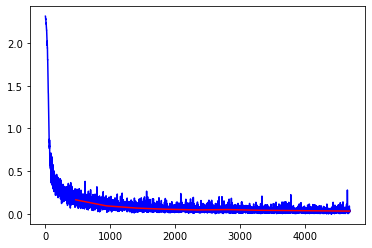




Convolutional layers = 2, Kernel size = 5, stride = 2
	Epoch 1: Average loss = 0.2619, Accuracy = 9245/10000 (92%)
	Epoch 2: Average loss = 0.1661, Accuracy = 9526/10000 (95%)
	Epoch 3: Average loss = 0.1223, Accuracy = 9637/10000 (96%)
	Epoch 4: Average loss = 0.1071, Accuracy = 9685/10000 (97%)
	Epoch 5: Average loss = 0.0908, Accuracy = 9742/10000 (97%)
	Epoch 6: Average loss = 0.0848, Accuracy = 9748/10000 (97%)
	Epoch 7: Average loss = 0.0778, Accuracy = 9770/10000 (98%)
	Epoch 8: Average loss = 0.0763, Accuracy = 9771/10000 (98%)
	Epoch 9: Average loss = 0.0682, Accuracy = 9787/10000 (98%)
	Epoch 10: Average loss = 0.0673, Accuracy = 9794/10000 (98%)


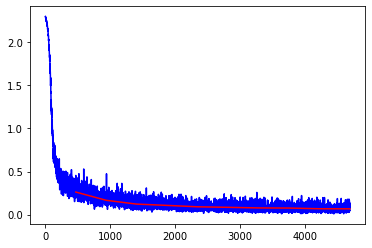




Convolutional layers = 2, Kernel size = 3, stride = 1
	Epoch 1: Average loss = 0.2115, Accuracy = 9317/10000 (93%)
	Epoch 2: Average loss = 0.1181, Accuracy = 9629/10000 (96%)
	Epoch 3: Average loss = 0.0832, Accuracy = 9759/10000 (98%)
	Epoch 4: Average loss = 0.0742, Accuracy = 9770/10000 (98%)
	Epoch 5: Average loss = 0.0551, Accuracy = 9819/10000 (98%)
	Epoch 6: Average loss = 0.0459, Accuracy = 9855/10000 (99%)
	Epoch 7: Average loss = 0.0424, Accuracy = 9866/10000 (99%)
	Epoch 8: Average loss = 0.0470, Accuracy = 9837/10000 (98%)
	Epoch 9: Average loss = 0.0357, Accuracy = 9882/10000 (99%)
	Epoch 10: Average loss = 0.0377, Accuracy = 9880/10000 (99%)


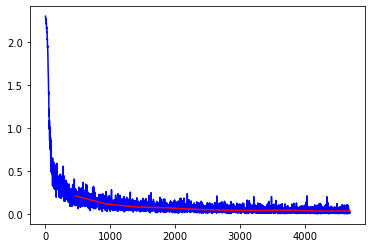




Convolutional layers = 2, Kernel size = 2, stride = 1
	Epoch 1: Average loss = 0.2979, Accuracy = 9081/10000 (91%)
	Epoch 2: Average loss = 0.1634, Accuracy = 9494/10000 (95%)
	Epoch 3: Average loss = 0.1132, Accuracy = 9673/10000 (97%)
	Epoch 4: Average loss = 0.0942, Accuracy = 9699/10000 (97%)
	Epoch 5: Average loss = 0.0779, Accuracy = 9759/10000 (98%)
	Epoch 6: Average loss = 0.0708, Accuracy = 9767/10000 (98%)
	Epoch 7: Average loss = 0.0646, Accuracy = 9794/10000 (98%)
	Epoch 8: Average loss = 0.0563, Accuracy = 9825/10000 (98%)
	Epoch 9: Average loss = 0.0559, Accuracy = 9825/10000 (98%)
	Epoch 10: Average loss = 0.0553, Accuracy = 9810/10000 (98%)


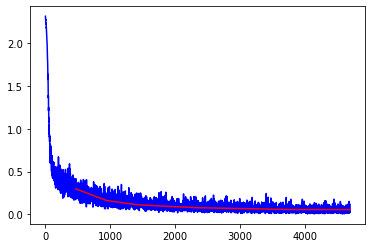




Convolutional layers = 2, Kernel size = 2, stride = 2
	Epoch 1: Average loss = 1.3877, Accuracy = 5402/10000 (54%)
	Epoch 2: Average loss = 0.8950, Accuracy = 6995/10000 (70%)
	Epoch 3: Average loss = 0.6921, Accuracy = 7828/10000 (78%)
	Epoch 4: Average loss = 0.5928, Accuracy = 8147/10000 (81%)
	Epoch 5: Average loss = 0.5604, Accuracy = 8223/10000 (82%)
	Epoch 6: Average loss = 0.4895, Accuracy = 8464/10000 (85%)
	Epoch 7: Average loss = 0.4544, Accuracy = 8584/10000 (86%)
	Epoch 8: Average loss = 0.4332, Accuracy = 8645/10000 (86%)
	Epoch 9: Average loss = 0.4276, Accuracy = 8622/10000 (86%)
	Epoch 10: Average loss = 0.3802, Accuracy = 8815/10000 (88%)


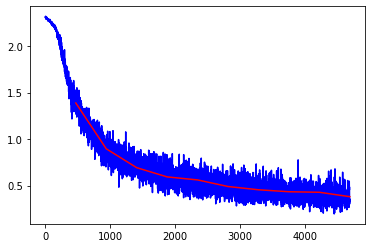




Convolutional layers = 3, Kernel size = 2, stride = 1
	Epoch 1: Average loss = 0.4347, Accuracy = 8712/10000 (87%)
	Epoch 2: Average loss = 0.2110, Accuracy = 9369/10000 (94%)
	Epoch 3: Average loss = 0.1476, Accuracy = 9528/10000 (95%)
	Epoch 4: Average loss = 0.1139, Accuracy = 9632/10000 (96%)
	Epoch 5: Average loss = 0.1031, Accuracy = 9690/10000 (97%)
	Epoch 6: Average loss = 0.0863, Accuracy = 9718/10000 (97%)
	Epoch 7: Average loss = 0.0847, Accuracy = 9746/10000 (97%)
	Epoch 8: Average loss = 0.0773, Accuracy = 9772/10000 (98%)
	Epoch 9: Average loss = 0.0699, Accuracy = 9784/10000 (98%)
	Epoch 10: Average loss = 0.0613, Accuracy = 9820/10000 (98%)


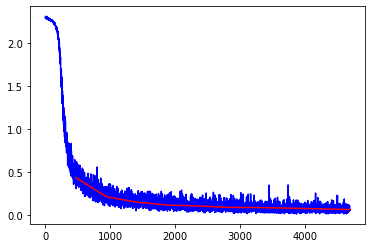

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
accuracy = []
time_vector = []
num_epochs = 10

#Execute default config

print('Convolutional layers = 2, Kernel size = 5, stride = 1')
t = time.time()
model = Net_c2_k5_s1().to(device)
train_network(model, accuracy)
time_vector.append(time.time() - t)

print('\n\n\nConvolutional layers = 2, Kernel size = 5, stride = 2')
t = time.time()
model = Net_c2_k5_s2().to(device)
train_network(model, accuracy)
time_vector.append(time.time() - t)

print('\n\n\nConvolutional layers = 2, Kernel size = 3, stride = 1')
t = time.time()
model = Net_c2_k3_s1().to(device)
train_network(model, accuracy)
time_vector.append(time.time() - t)

print('\n\n\nConvolutional layers = 2, Kernel size = 2, stride = 1')
t = time.time()
model = Net_c2_k2_s1().to(device)
train_network(model, accuracy)
time_vector.append(time.time() - t)

print('\n\n\nConvolutional layers = 2, Kernel size = 2, stride = 2')
t = time.time()
model = Net_c2_k2_s2().to(device)
train_network(model, accuracy)
time_vector.append(time.time() - t)

print('\n\n\nConvolutional layers = 3, Kernel size = 2, stride = 1')
t = time.time()
model = Net_c3_k2_s1().to(device)
train_network(model, accuracy)
time_vector.append(time.time() - t)

11. Create a brief "benchmark" algorithm to compute the performance

In [0]:
def benchmark(index):
  return round((accuracy[index])**2 - time_vector[index])

12. Print the results and the time needed for each variation


In [0]:
print('\033[1mConvolutional layers = 2, Kernel size = 5, stride = 1\033[0m')
index = 0
print('Time required: {} s'.format(round(time_vector[index])))
print('Accuracy obtained: {} %'.format(accuracy[index]))
print('Benchmark (the higher the better): {}'.format(benchmark(index)))
print('\n\033[1mConvolutional layers = 2, Kernel size = 5, stride = 2\033[0m')
index = 1
print('Time required: {} s'.format(round(time_vector[index])))
print('Accuracy obtained: {} %'.format(accuracy[index]))
print('Benchmark (the higher the better): {}'.format(benchmark(index)))
print('\n\033[1mConvolutional layers = 2, Kernel size = 3, stride = 1\033[0m')
index = 2
print('Time required: {} s'.format(round(time_vector[index])))
print('Accuracy obtained: {} %'.format(accuracy[index]))
print('Benchmark (the higher the better): {}'.format(benchmark(index)))
print('\n\033[1mConvolutional layers = 2, Kernel size = 2, stride = 1\033[0m')
index = 3
print('Time required: {} s'.format(round(time_vector[index])))
print('Accuracy obtained: {} %'.format(accuracy[index]))
print('Benchmark (the higher the better): {}'.format(benchmark(index)))
print('\n\033[1mConvolutional layers = 2, Kernel size = 2, stride = 2\033[0m')
index = 4
print('Time required: {} s'.format(round(time_vector[index])))
print('Accuracy obtained: {} %'.format(accuracy[index]))
print('Benchmark (the higher the better): {}'.format(benchmark(index)))
print('\n\033[1mConvolutional layers = 3, Kernel size = 2, stride = 1\033[0m')
index = 5
print('Time required: {} s'.format(round(time_vector[index])))
print('Accuracy obtained: {} %'.format(accuracy[index]))
print('Benchmark (the higher the better): {}'.format(benchmark(index)))


Convolutional layers = 2, Kernel size = 5, stride = 1
Time required: 119 s
Accuracy obtained: 98.74 %
Benchmark (the higher the better): 9630

Convolutional layers = 2, Kernel size = 5, stride = 2
Time required: 92 s
Accuracy obtained: 97.94 %
Benchmark (the higher the better): 9500

Convolutional layers = 2, Kernel size = 3, stride = 1
Time required: 100 s
Accuracy obtained: 98.8 %
Benchmark (the higher the better): 9662

Convolutional layers = 2, Kernel size = 2, stride = 1
Time required: 100 s
Accuracy obtained: 98.1 %
Benchmark (the higher the better): 9523

Convolutional layers = 2, Kernel size = 2, stride = 2
Time required: 89 s
Accuracy obtained: 88.15 %
Benchmark (the higher the better): 7681

Convolutional layers = 3, Kernel size = 2, stride = 1
Time required: 101 s
Accuracy obtained: 98.2 %
Benchmark (the higher the better): 9542


**CONCLUSIONS**

We can see that the default configuration (2 convolutional layers, kernel size of 5x5 and stride = 1) is the best one in terms of accuracy and convergence speed. The final accuracy is 98.82% with 10 training epochs but it reaches levels above 97% within the first epochs. Reducing the kernel size to 2 and increasing the stride to 2 results in the worst accuracy (87.87%) and even worse convergence speed, needing more than 6 training epochs to reach an 86% of accuracy. However, if we compare the time needed to train our network, the default configuration is the slowest one (119 s) while the configuration with less accuracy is the fastest one (89 s). It makes sence since increasing the stride reduces the number of points taken into account when applying the convolution with the kernel, and thus decreasing the number of input perceptrons of the fully connected layers. However, it is not worth it to lose more than 10% of accuracy only to reduce the training time by 30 s (26%). For this reason, when developing the benchmark, we tryed to give more points to the accuracy rather than the execution time.